Lab: Logistic Regression, LDA, QDA, and KNN

In [1]:
!pip install -Uq statsmodels

Import the necessary libraries

In [4]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize)

#-----------------------#

from ISLP import confusion_table
from ISLP.models import contrast
from sklearn.discriminant_analysis import (LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA)
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [5]:
smarket = load_data('Smarket')

In [8]:
smarket.head()

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today,Direction
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.1913,0.959,Up
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.2965,1.032,Up
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.4112,-0.623,Down
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.2760,0.614,Up
4,2001,0.614,-0.623,1.032,0.959,0.381,1.2057,0.213,Up


In [63]:
corr_mat = smarket.drop(['Year'],axis=1).corr()
corr_mat

/tmp/ipykernel_10712/3601181988.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_mat = smarket.drop(['Year'],axis=1).corr()


,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
Lag1,1.000000,-0.026294,-0.010803,-0.002986,-0.005675,0.040910,-0.026155
Lag2,-0.026294,1.000000,-0.025897,-0.010854,-0.003558,-0.043383,-0.010250
Lag3,-0.010803,-0.025897,1.000000,-0.024051,-0.018808,-0.041824,-0.002448
Lag4,-0.002986,-0.010854,-0.024051,1.000000,-0.027084,-0.048414,-0.006900
Lag5,-0.005675,-0.003558,-0.018808,-0.027084,1.000000,-0.022002,-0.034860
Volume,0.040910,-0.043383,-0.041824,-0.048414,-0.022002,1.000000,0.014592
Today,-0.026155,-0.010250,-0.002448,-0.006900,-0.034860,0.014592,1.000000


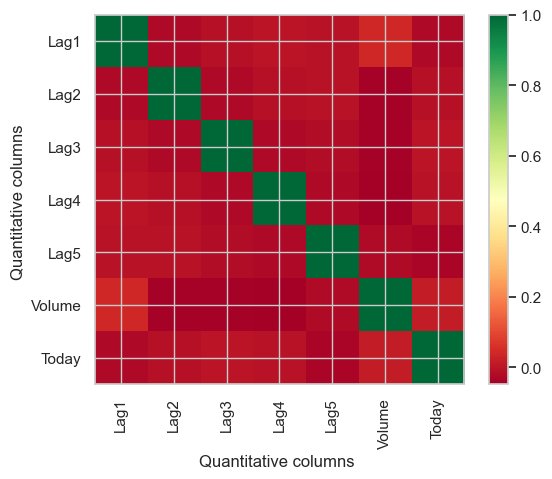

In [67]:
#Further we find the corr() between the quantitative columns, to check how they are related to each other
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

#Correlation matrix
plt.grid('off')
plt.xlabel('Quantitative columns ')
plt.ylabel('Quantitative columns ')
plt.imshow(corr_mat, cmap='RdYlGn', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_mat)),corr_mat.columns,rotation=90)
plt.yticks(range(len(corr_mat)),corr_mat.columns,rotation=360)
plt.show()
#Correlation matrix


<Axes: >

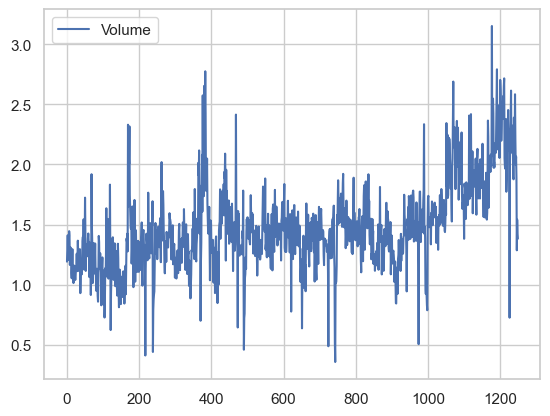

In [53]:
smarket.plot(y='Volume')

Implementation of Logistic Regression model

In [ ]:
# We will fit a logreg model to predict the qualitative feature or the target variable Direction.We wil use the statsmodels library for that

allvars = sma   r